In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/california_housing.csv")
df = pd.DataFrame(data)

In [3]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:\n", df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.

<Figure size 1200x800 with 0 Axes>

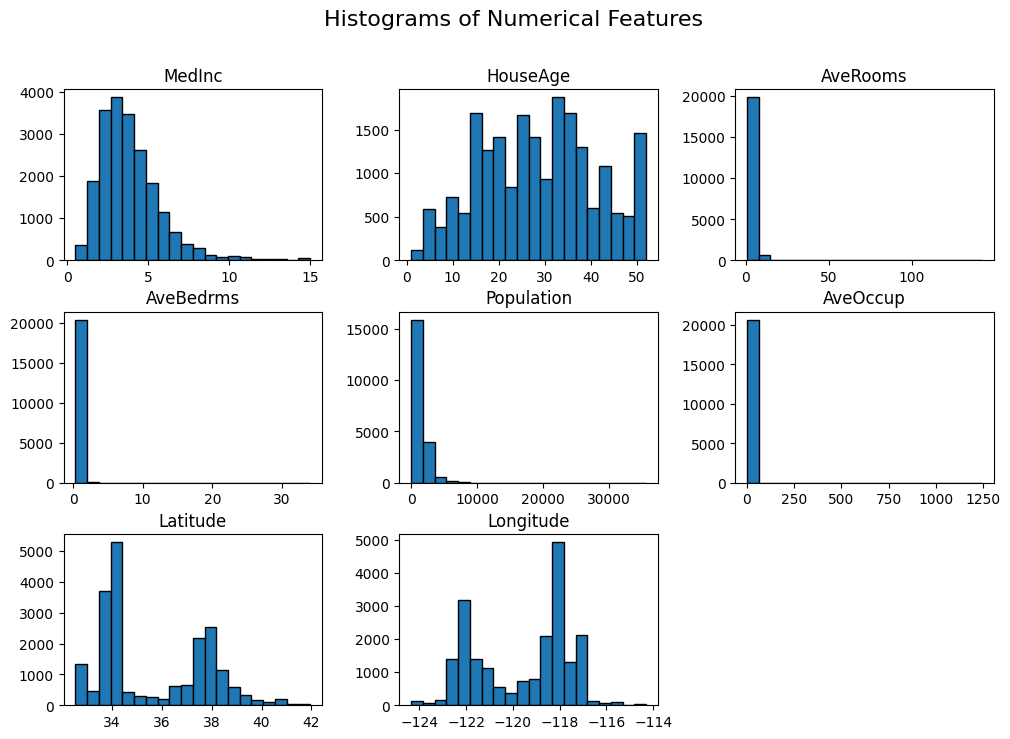

In [4]:
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), edgecolor='black', grid=False)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

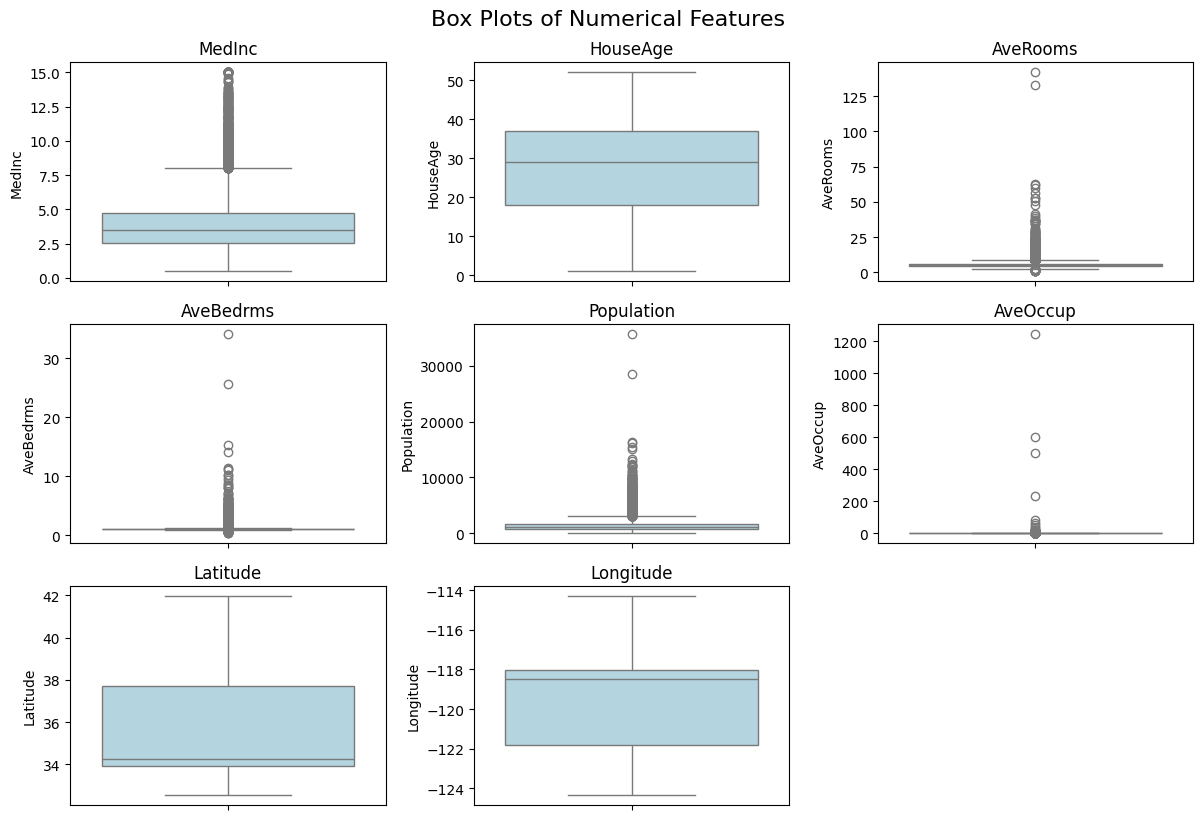

In [5]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(y=df[column], color="lightblue")
  plt.title(column)
plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()

In [7]:
print("\nSummary Statistics:")
print(df.describe())
outlier_counts = {}
for column in df.columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
  outlier_counts[column] = len(outliers)


Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.4297

In [9]:
print("\nOutliers Detected per Feature:")
for feature, count in outlier_counts.items():
  print(f"{feature}: {count} outliers")


Outliers Detected per Feature:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
